In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('silver_2.csv')
df

,Unnamed: 0,title,author,year,publication_year,description,Genre,Author_Rating,total_weeks,best_rank,...,average_rating,ratings_count,rating,review_text,n_votes,is_expert,Units_Sold,Gross_Sales,Sale_Price,Sales_Rank
0,0,Cryptonomicon,Neal Stephenson,1999,2002,"Cryptonomicon zooms all over the world, careen...",Children,Excellent,3,12,...,4.250000,60704.366197,5.0,Numero uno for me; I've read it several times....,0.0,0,106738560,697276.80,2.48,694
1,1,High Five,Janet Evanovich,1999,2011,What's Stephanie up to now?\nHer Uncle Fred ha...,Children,Excellent,2,13,...,4.170000,7.000000,4.0,"People aren't jumping bail, so Stephanie's wor...",0.0,0,86400,1343.10,5.55,745
2,2,Cryptonomicon,Neal Stephenson,1999,2002,"Cryptonomicon zooms all over the world, careen...",Children,Excellent,3,12,...,4.250000,60704.366197,4.0,"Intricately plotted, well written, and nerdly!",0.0,0,106738560,697276.80,2.48,694
3,3,Cryptonomicon,Neal Stephenson,1999,2002,"Cryptonomicon zooms all over the world, careen...",Children,Excellent,3,12,...,4.250000,60704.366197,2.0,Two stars is probably less generous than I mig...,0.0,0,106738560,697276.80,2.48,694
4,4,High Five,Janet Evanovich,1999,2011,What's Stephanie up to now?\nHer Uncle Fred ha...,Children,Excellent,2,13,...,4.170000,7.000000,4.0,"People aren't jumping bail, so Stephanie's wor...",0.0,0,86400,1343.10,5.55,745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2095,Insomnia,Stephen King,1994,1994,Ralph Roberts hasn't been sleeping well lately...,Fiction,Intermediate,16,1,...,3.815026,1240.759162,4.0,"Good book, but I'd forgotten how weird Stephen...",0.0,0,17905104,7062568.80,10.65,416
2096,2096,The Surgeon,Tess Gerritsen,2001,2001,"In Boston, there's a killer on the loose. A ki...",Nonfiction,Excellent,2,13,...,3.963333,18.666667,5.0,This is a breathtaking Thriller which i highly...,3.0,1,27054,11011.98,10.99,536
2097,2097,After You,Jojo Moyes,2015,2009,The complexities of a friendship. The unexplor...,Fiction,Intermediate,20,3,...,3.749222,2103.300000,5.0,"A beautiful story of loss, the bonds that sust...",0.0,0,3571200,3535488.00,0.99,36
2098,2098,Death Comes To Pemberley,P. D. James,2011,2011,The world is classic Jane Austen. The mystery ...,Fiction,Novice,13,3,...,3.210000,53285.143959,4.0,I considered mounting a passionate defense in ...,190.0,1,2164396,8635940.04,3.99,1220


In [3]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [4]:

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 90)

print("Shape:", df.shape)
print("Columns:", list(df.columns))
display(df.head())

Shape: (2100, 23)
Columns: ['Unnamed: 0', 'title', 'author', 'year', 'publication_year', 'description', 'Genre', 'Author_Rating', 'total_weeks', 'best_rank', 'worst_rank', 'mean_rank', 'debut_rank', 'average_rating', 'ratings_count', 'rating', 'review_text', 'n_votes', 'is_expert', 'Units_Sold', 'Gross_Sales', 'Sale_Price', 'Sales_Rank']


,Unnamed: 0,title,author,year,publication_year,description,Genre,Author_Rating,total_weeks,best_rank,worst_rank,mean_rank,debut_rank,average_rating,ratings_count,rating,review_text,n_votes,is_expert,Units_Sold,Gross_Sales,Sale_Price,Sales_Rank
0,0,Cryptonomicon,Neal Stephenson,1999,2002,"Cryptonomicon zooms all over the world, careening conspiratorially back and forth betw...",Children,Excellent,3,12,15,14.0,14,4.25,60704.366197,5.0,"Numero uno for me; I've read it several times. Does that make me crazy? Worse yet, I'v...",0.0,0,106738560,697276.8,2.48,694
1,1,High Five,Janet Evanovich,1999,2011,What's Stephanie up to now?\nHer Uncle Fred has disappeared. A body turns up in a garb...,Children,Excellent,2,13,15,14.0,14,4.17,7.000000,4.0,"People aren't jumping bail, so Stephanie's working for Ranger in some of his other, mo...",0.0,0,86400,1343.1,5.55,745
2,2,Cryptonomicon,Neal Stephenson,1999,2002,"Cryptonomicon zooms all over the world, careening conspiratorially back and forth betw...",Children,Excellent,3,12,15,14.0,14,4.25,60704.366197,4.0,"Intricately plotted, well written, and nerdly!",0.0,0,106738560,697276.8,2.48,694
3,3,Cryptonomicon,Neal Stephenson,1999,2002,"Cryptonomicon zooms all over the world, careening conspiratorially back and forth betw...",Children,Excellent,3,12,15,14.0,14,4.25,60704.366197,2.0,"Two stars is probably less generous than I might be, but despite everything I liked ab...",0.0,0,106738560,697276.8,2.48,694
4,4,High Five,Janet Evanovich,1999,2011,What's Stephanie up to now?\nHer Uncle Fred has disappeared. A body turns up in a garb...,Children,Excellent,2,13,15,14.0,14,4.17,7.000000,4.0,"People aren't jumping bail, so Stephanie's working for Ranger in some of his other, mo...",0.0,0,86400,1343.1,5.55,745


# **1. Column overview (dtype, missing, unique)**

In [5]:
info_df = pd.DataFrame({
    "column": df.columns,
    "dtype": [df[c].dtype for c in df.columns],
    "non_null": [df[c].notna().sum() for c in df.columns],
    "nulls": [df[c].isna().sum() for c in df.columns],
    "null_%": [round(df[c].isna().mean()*100, 2) for c in df.columns],
    "n_unique": [df[c].nunique(dropna=True) for c in df.columns],
}).sort_values(["nulls", "n_unique"], ascending=[False, True])

display(info_df)

,column,dtype,non_null,nulls,null_%,n_unique
5,description,object,2058,42,2.0,599
18,is_expert,int64,2100,0,0.0,2
6,Genre,object,2100,0,0.0,3
7,Author_Rating,object,2100,0,0.0,4
15,rating,float64,2100,0,0.0,6
10,worst_rank,int64,2100,0,0.0,14
9,best_rank,int64,2100,0,0.0,16
12,debut_rank,int64,2100,0,0.0,16
8,total_weeks,int64,2100,0,0.0,50
4,publication_year,int64,2100,0,0.0,54


# **2.** Duplicates + "unit of analysis" check


In [6]:
row_dups = df.duplicated().sum()
book_key = df["title"].astype(str).str.strip() + "||" + df["author"].astype(str).str.strip()
n_books = book_key.nunique()
reviews_per_book = df.groupby(book_key).size().describe()

summary = pd.DataFrame({
    "metric": [
        "n_rows", "n_columns", "duplicate_rows_exact",
        "unique_books(title+author)",
        "avg_reviews_per_book", "min_reviews_per_book", "max_reviews_per_book"
    ],
    "value": [
        df.shape[0], df.shape[1], int(row_dups),
        int(n_books),
        float(reviews_per_book["mean"]), int(reviews_per_book["min"]), int(reviews_per_book["max"]),
    ]
})
display(summary)

,metric,value
0,n_rows,2100.000000
1,n_columns,23.000000
2,duplicate_rows_exact,0.000000
3,unique_books(title+author),344.000000
4,avg_reviews_per_book,6.104651
5,min_reviews_per_book,1.000000
6,max_reviews_per_book,10.000000


# 3) Numeric & categorical summaries


In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

num_summary = df[num_cols].describe().T
num_summary["skew"] = df[num_cols].skew(numeric_only=True)
num_summary["kurtosis"] = df[num_cols].kurtosis(numeric_only=True)
display(num_summary.sort_values("skew", ascending=False))

cat_rows = []
for c in cat_cols:
    vc = df[c].astype("string").value_counts(dropna=False)
    cat_rows.append({
        "column": c,
        "dtype": str(df[c].dtype),
        "n_unique": int(df[c].nunique(dropna=True)),
        "top_value": str(vc.index[0])[:90],
        "top_count": int(vc.iloc[0]),
        "missing": int(df[c].isna().sum()),
    })
cat_summary = pd.DataFrame(cat_rows).sort_values(["missing", "n_unique"], ascending=[False, True])
display(cat_summary)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Gross_Sales,2100.0,3.036250e+07,3.527665e+08,594.00,162920.340000,1.809008e+06,7.156858e+06,6.581802e+09,18.333353,338.019033
Units_Sold,2100.0,5.649475e+07,1.820752e+08,749.00,492264.000000,4.244400e+06,2.337490e+07,1.829187e+09,5.934221,43.137026
n_votes,2100.0,3.115143e+01,8.702067e+01,0.00,0.000000,0.000000e+00,2.125000e+01,1.041000e+03,5.773348,45.067161
total_weeks,2100.0,1.318905e+01,1.484662e+01,1.00,4.000000,9.000000e+00,1.700000e+01,1.650000e+02,3.951295,28.961771
best_rank,2100.0,4.704286e+00,4.358044e+00,1.00,1.000000,3.000000e+00,7.000000e+00,1.600000e+01,1.047727,-0.065809
Sale_Price,2100.0,4.463219e+00,3.230559e+00,0.99,1.990000,3.990000e+00,6.550000e+00,1.798000e+01,0.945881,0.494084
mean_rank,2100.0,8.269027e+00,3.149355e+00,2.50,5.851852,7.714286e+00,1.000000e+01,1.600000e+01,0.600788,-0.385891
is_expert,2100.0,3.723810e-01,4.835543e-01,0.00,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,0.528341,-1.722497
ratings_count,2100.0,3.799542e+04,4.022613e+04,1.00,229.974138,3.316569e+04,7.067522e+04,1.670578e+05,0.520282,-0.972888
Sales_Rank,2100.0,5.873171e+02,3.832003e+02,1.00,239.000000,5.510000e+02,9.440000e+02,1.272000e+03,0.178716,-1.263301


,column,dtype,n_unique,top_value,top_count,missing
2,description,object,599,<NA>,42,42
3,Genre,object,3,Fiction,1701,0
4,Author_Rating,object,4,Intermediate,1525,0
1,author,object,215,Stephen King,198,0
0,title,object,321,Gone,27,0
5,review_text,object,1164,Dual review with Swedish first and then English! \n SWEDISH REVIEW \n Om det ar nagot ...,12,0


# 4) Univariate plots (hist + boxplot)


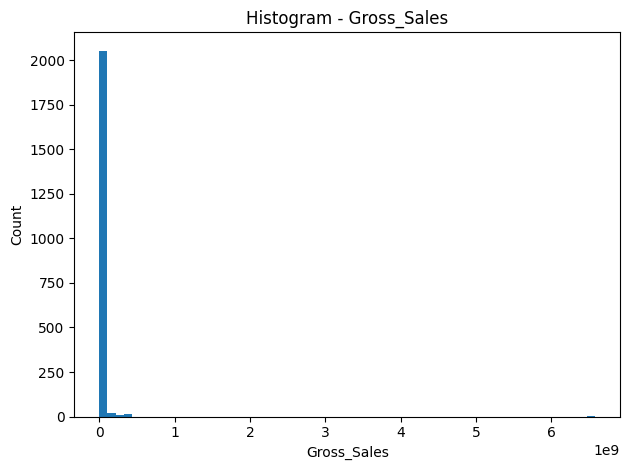

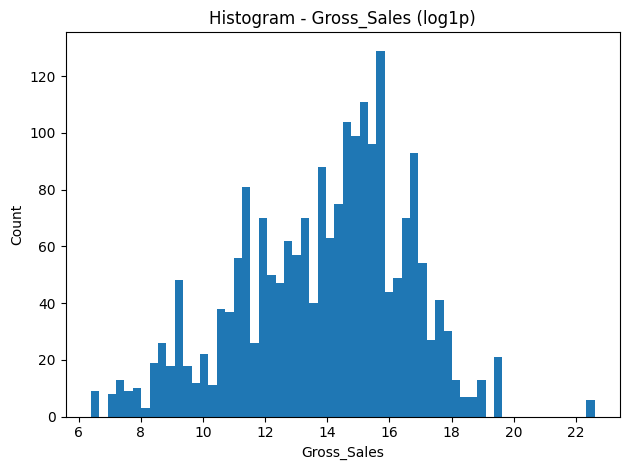

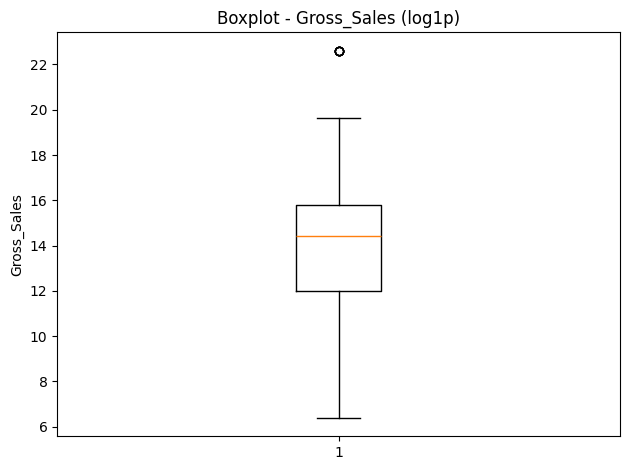

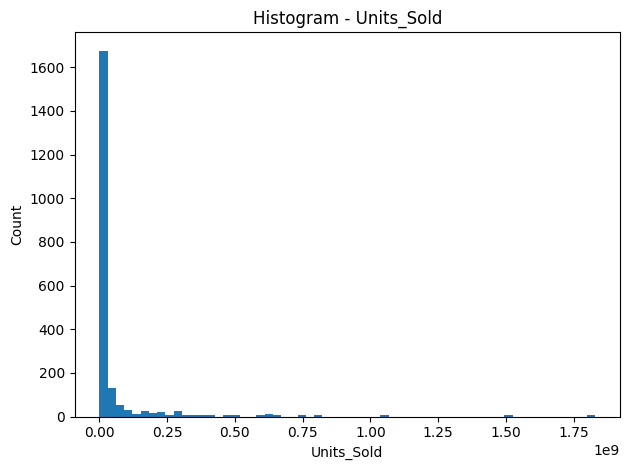

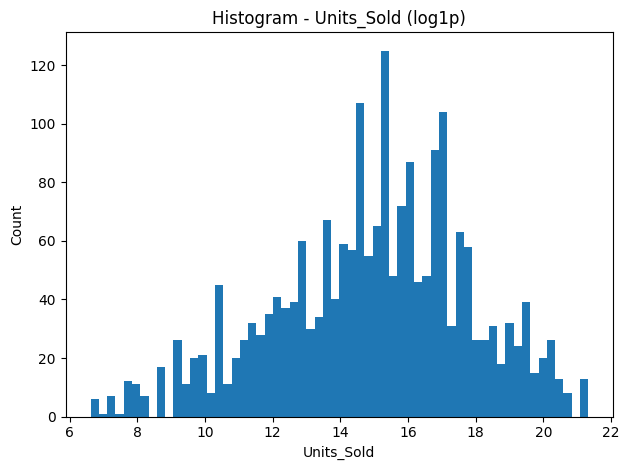

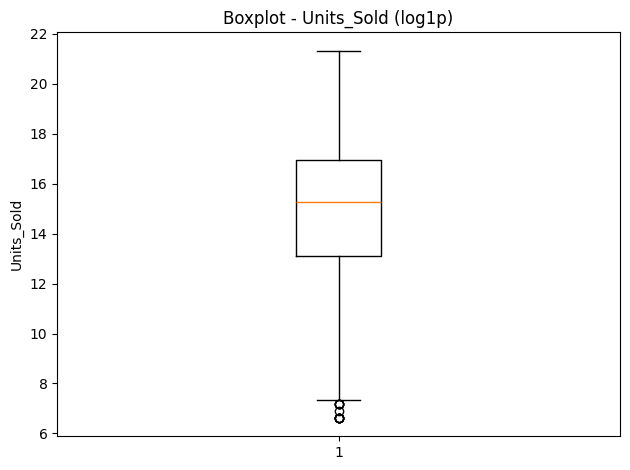

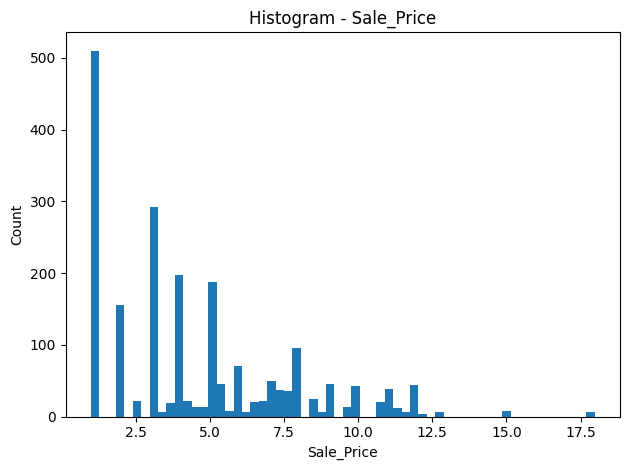

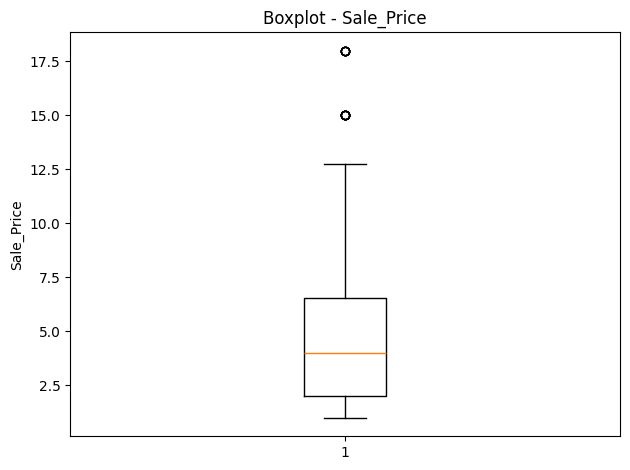

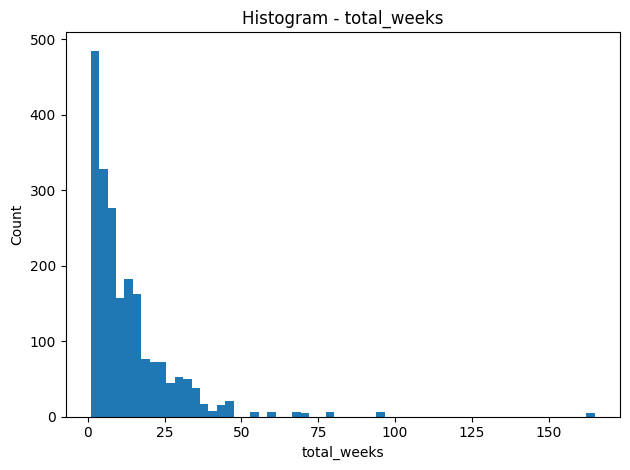

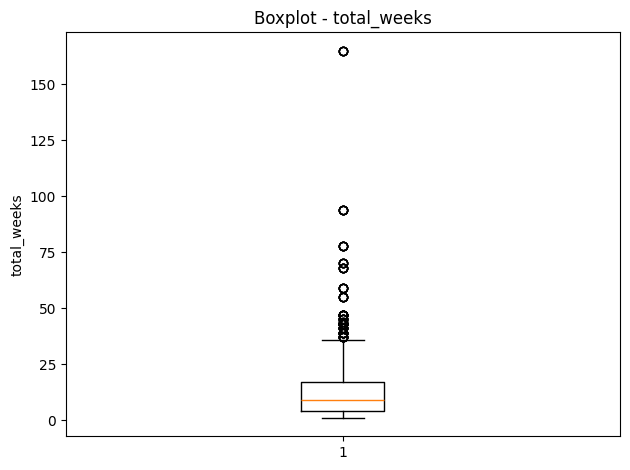

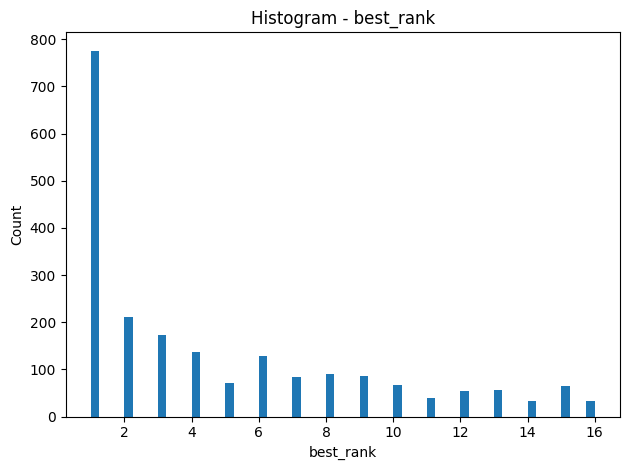

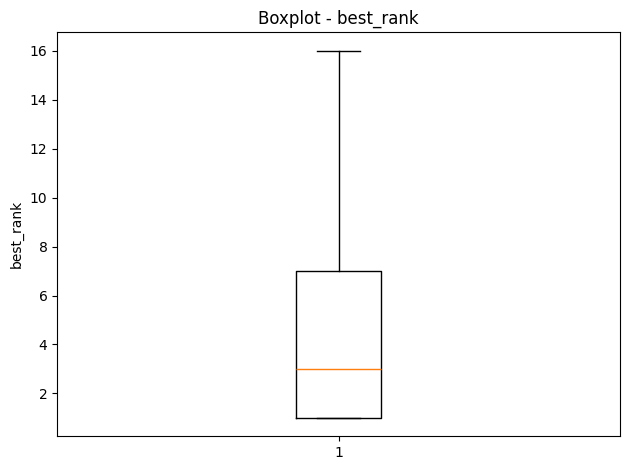

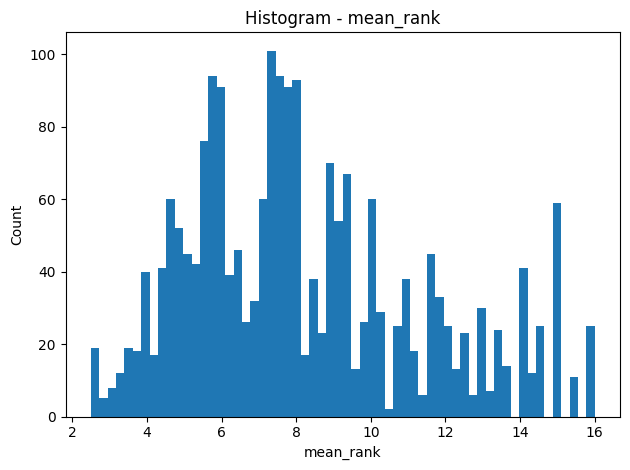

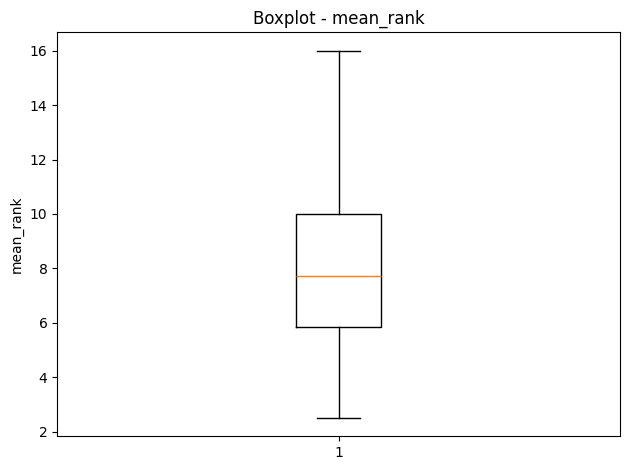

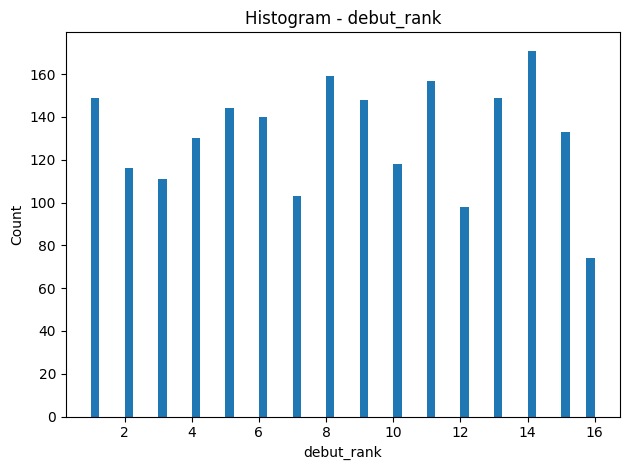

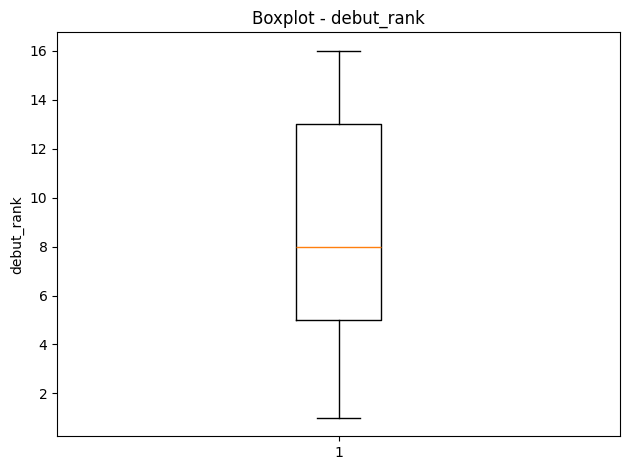

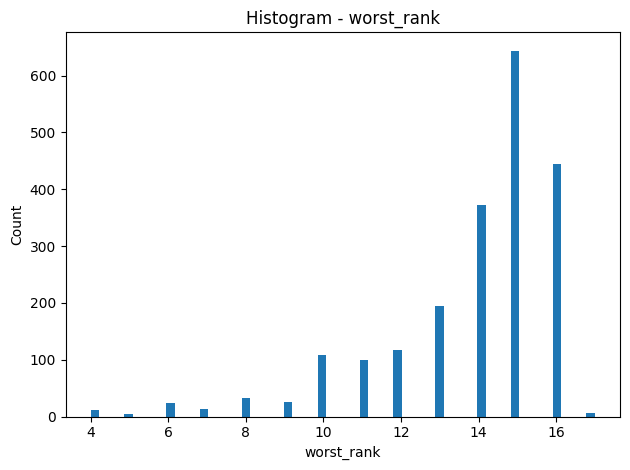

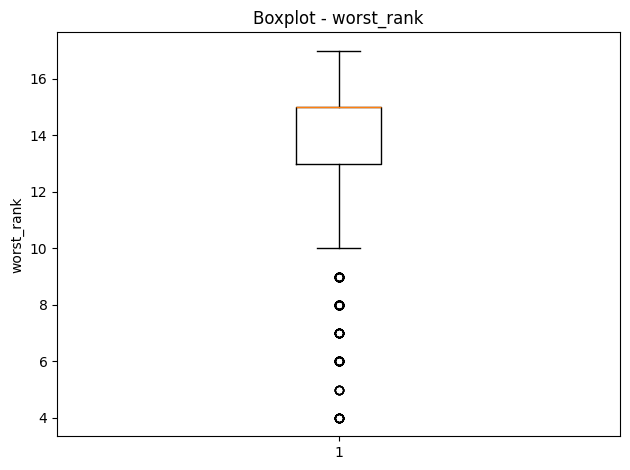

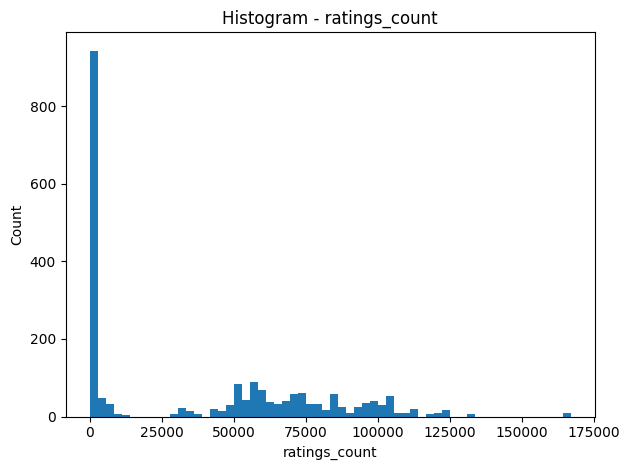

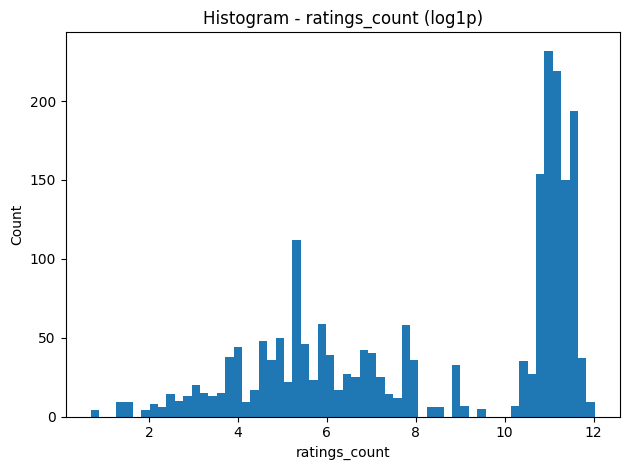

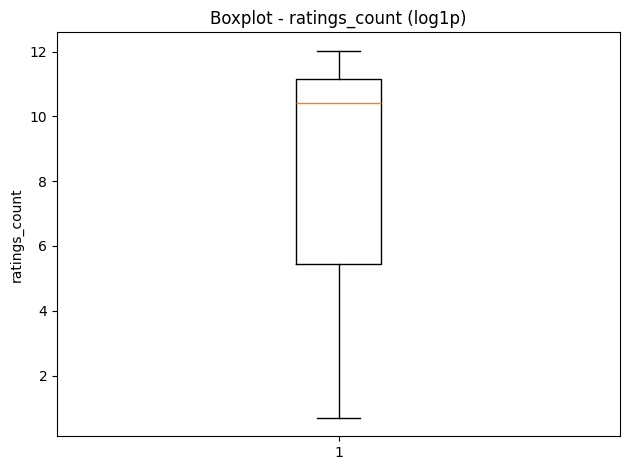

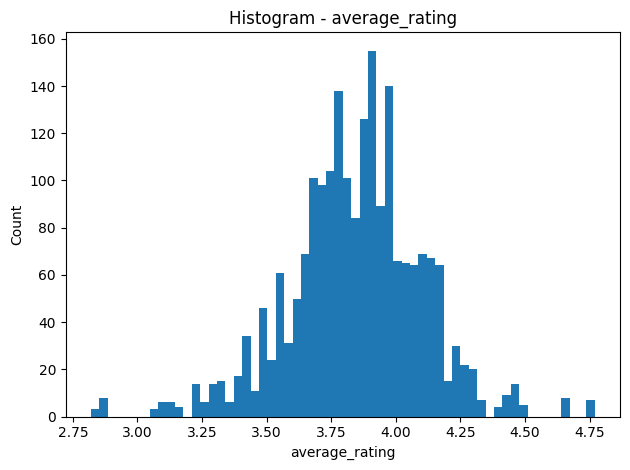

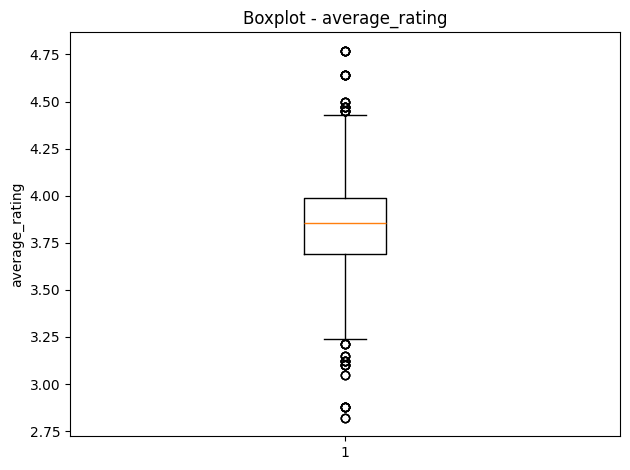

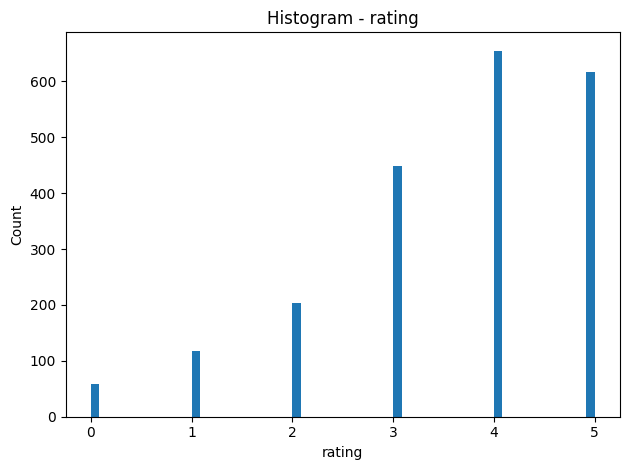

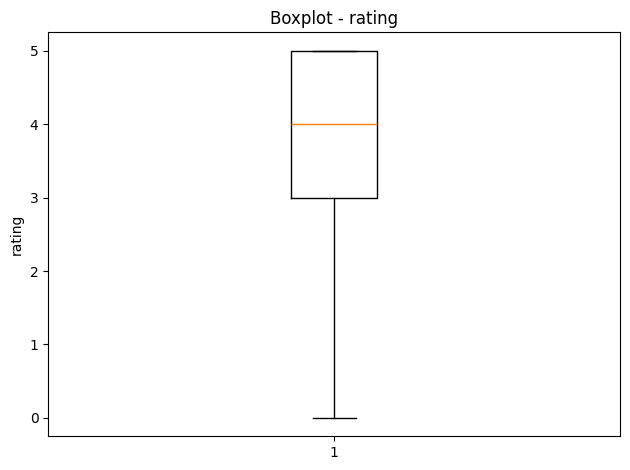

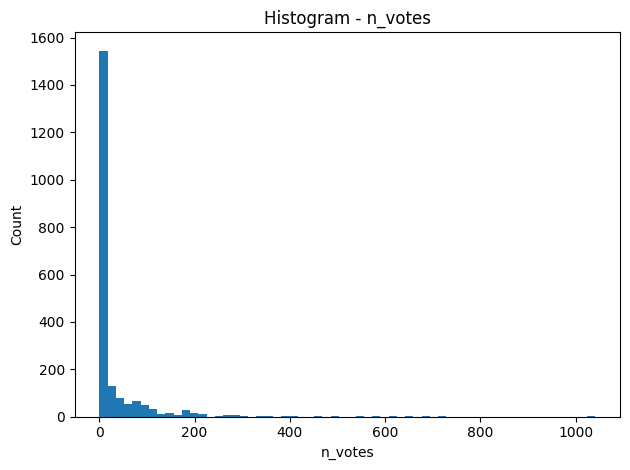

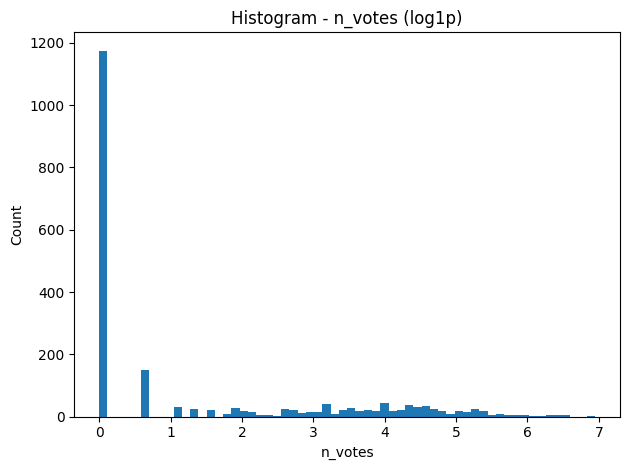

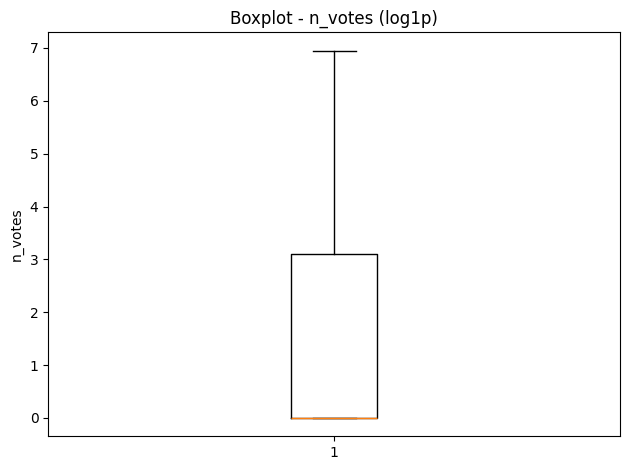

In [8]:
OUT_DIR = "eda_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

def hist_plot(series, title, fname, bins=60, log1p=False):
    s = series.dropna()
    if log1p:
        s = np.log1p(s)
        title = title + " (log1p)"
    plt.figure()
    plt.hist(s, bins=bins)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Count")
    plt.tight_layout()
    path = os.path.join(OUT_DIR, fname)
    plt.savefig(path, dpi=160)
    plt.show()
    plt.close()
    return path

def box_plot(series, title, fname, log1p=False):
    s = series.dropna()
    if log1p:
        s = np.log1p(s)
        title = title + " (log1p)"
    plt.figure()
    plt.boxplot(s, vert=True)
    plt.title(title)
    plt.ylabel(series.name)
    plt.tight_layout()
    path = os.path.join(OUT_DIR, fname)
    plt.savefig(path, dpi=160)
    plt.show()
    plt.close()
    return path

key_numeric = [
    "Gross_Sales", "Units_Sold", "Sale_Price",
    "total_weeks", "best_rank", "mean_rank", "debut_rank", "worst_rank",
    "ratings_count", "average_rating", "rating", "n_votes",
]

for col in key_numeric:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        hist_plot(df[col], f"Histogram - {col}", f"hist_{col}.png", bins=60, log1p=False)
        if col in ["Gross_Sales", "Units_Sold", "ratings_count", "n_votes"]:
            hist_plot(df[col], f"Histogram - {col}", f"hist_{col}_log.png", bins=60, log1p=True)
            box_plot(df[col], f"Boxplot - {col}", f"box_{col}_log.png", log1p=True)
        else:
            box_plot(df[col], f"Boxplot - {col}", f"box_{col}.png", log1p=False)


# 5) Categorical distribution plots


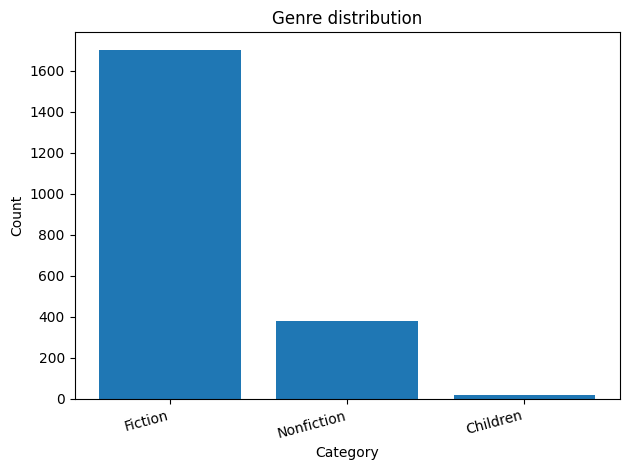

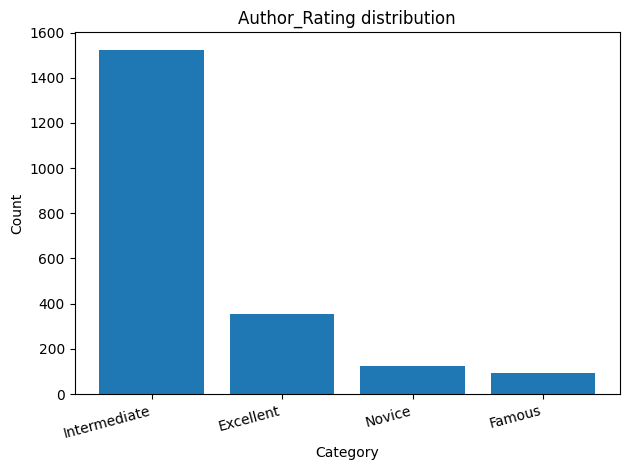

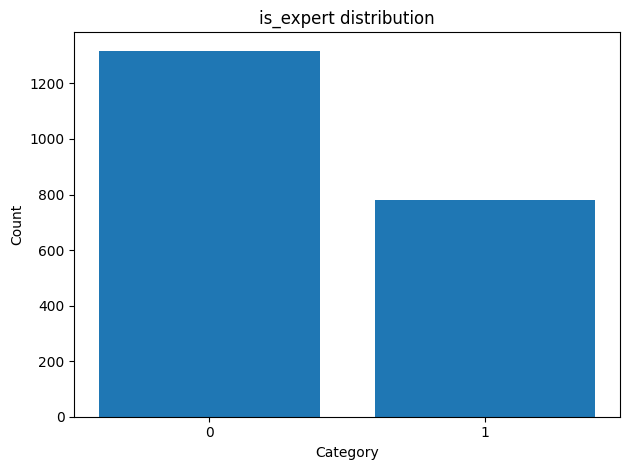

In [9]:
def bar_plot(vc, title, fname, rotate=0):
    plt.figure()
    plt.bar(vc.index.astype(str), vc.values)
    plt.title(title)
    plt.xlabel("Category")
    plt.ylabel("Count")
    if rotate:
        plt.xticks(rotation=rotate, ha="right")
    plt.tight_layout()
    path = os.path.join(OUT_DIR, fname)
    plt.savefig(path, dpi=160)
    plt.show()
    plt.close()
    return path

if "Genre" in df.columns:
    bar_plot(df["Genre"].value_counts(), "Genre distribution", "bar_genre.png", rotate=15)
if "Author_Rating" in df.columns:
    bar_plot(df["Author_Rating"].value_counts(), "Author_Rating distribution", "bar_author_rating.png", rotate=15)
if "is_expert" in df.columns:
    bar_plot(df["is_expert"].value_counts().sort_index(), "is_expert distribution", "bar_is_expert.png")


# 6) Book-level aggregation (recommended for modeling)


In [10]:
def mode(series):
    vc = series.value_counts(dropna=True)
    return vc.index[0] if len(vc) else np.nan

book = df.groupby(["title", "author"]).agg(
    year=("year", "first"),
    publication_year=("publication_year", mode),
    Genre=("Genre", mode),
    Author_Rating=("Author_Rating", mode),
    description=("description", lambda s: s.dropna().iloc[0] if s.dropna().shape[0] else ""),
    average_rating=("average_rating", "first"),
    ratings_count=("ratings_count", "first"),
    total_weeks=("total_weeks", "first"),
    best_rank=("best_rank", "first"),
    mean_rank=("mean_rank", "first"),
    debut_rank=("debut_rank", "first"),
    worst_rank=("worst_rank", "first"),
    Units_Sold=("Units_Sold", "first"),
    Gross_Sales=("Gross_Sales", "first"),
    Sale_Price=("Sale_Price", "first"),
    Sales_Rank=("Sales_Rank", "first"),
    # review aggregates:
    review_count=("review_text", "count"),
    rating_mean=("rating", "mean"),
    rating_std=("rating", "std"),
    votes_mean=("n_votes", "mean"),
    votes_sum=("n_votes", "sum"),
    expert_pct=("is_expert", "mean"),
).reset_index()

book["log_gross_sales"] = np.log1p(book["Gross_Sales"])
book["log_units_sold"] = np.log1p(book["Units_Sold"])
book["edition_gap"] = book["publication_year"] - book["year"]
book["desc_len"] = book["description"].fillna("").astype(str).str.len()

print("Book-level shape:", book.shape)
display(book.head())

Book-level shape: (344, 28)


,title,author,year,publication_year,Genre,Author_Rating,description,average_rating,ratings_count,total_weeks,best_rank,mean_rank,debut_rank,worst_rank,Units_Sold,Gross_Sales,Sale_Price,Sales_Rank,review_count,rating_mean,rating_std,votes_mean,votes_sum,expert_pct,log_gross_sales,log_units_sold,edition_gap,desc_len
0,2Nd Chance,James Patterson with Andrew Gross,2002,2005,Fiction,Excellent,A brutal madman sprays bullets into a crowd of children leaving a San Francisco church...,4.0100,4.00,8,1,5.0000,12,14,22896,11110.16,12.29,993,3,4.000000,0.000000,0.0,0.0,0.0,9.315705,10.038761,3,565
1,A Bend In The Road,Nicholas Sparks,2001,2002,Fiction,Intermediate,Miles Ryan's life seemed to end the day his wife was killed in a hit-and-run accident ...,4.0200,23.00,20,2,9.4500,1,16,27200,54128.00,1.99,164,3,3.333333,0.577350,0.0,0.0,0.0,10.899125,10.211009,1,1004
2,A Breath Of Snow And Ashes,Diana Gabaldon,2005,2005,Nonfiction,Famous,A Breath of Snow and Ashescontinues the extraordinary story of 18th-century Scotsman J...,4.4300,12.00,5,1,6.8000,2,14,22140,8733.00,10.65,547,5,5.000000,0.000000,0.0,0.0,0.0,9.074979,10.005186,0,891
3,A Crown Of Swords,Robert Jordan,1996,2013,Nonfiction,Intermediate,"The Wheel of Time, Robert Jordan's internationally bestselling fantasy series, has cap...",4.0100,91.00,8,2,7.7500,16,15,1728000,4403.52,0.99,661,6,4.000000,0.000000,4.0,24.0,0.5,8.390387,14.362476,17,774
4,A Death In The Family,James Agee,1957,2012,Fiction,Intermediate,"The classic American novel, re-published for the 100th anniversary of James Agee's bir...",3.9529,6900.55,16,9,13.6875,1,16,777600,4782240.00,6.15,364,6,4.166667,1.169045,49.0,294.0,0.5,15.380420,13.563969,55,660


# 7) Correlation analysis (book-level)


,feature,corr_with_log_gross_sales
0,log_gross_sales,1.000000
1,log_units_sold,0.709821
2,ratings_count,0.668535
3,review_count,0.479416
4,votes_sum,0.477355
5,votes_mean,0.474063
6,expert_pct,0.409465
7,total_weeks,0.322789
8,rating_std,0.316843
9,Units_Sold,0.262903


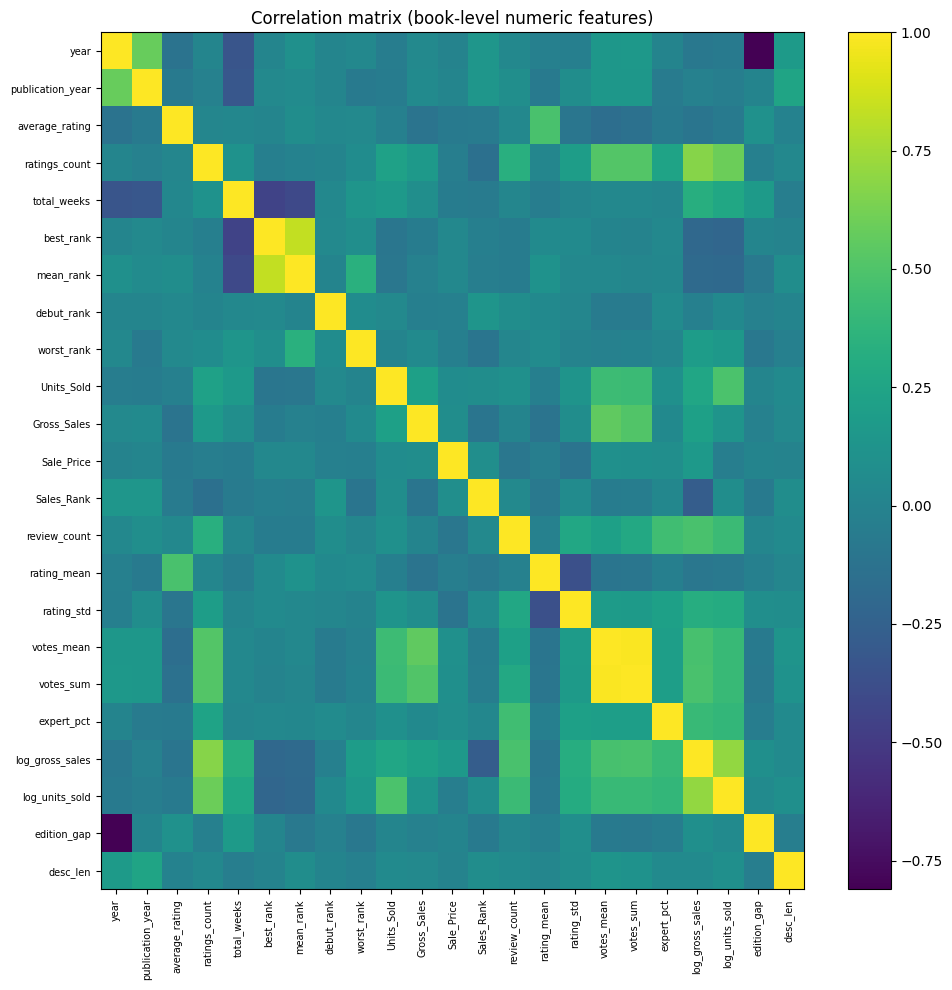

In [11]:
book_num_cols = book.select_dtypes(include=[np.number]).columns
corr = book[book_num_cols].corr(numeric_only=True)

target = "log_gross_sales"
corr_target = corr[target].sort_values(ascending=False).reset_index()
corr_target.columns = ["feature", f"corr_with_{target}"]
display(corr_target)

# Heatmap
plt.figure(figsize=(10, 10))
plt.imshow(corr.values, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=7)
plt.yticks(range(len(corr.index)), corr.index, fontsize=7)
plt.title("Correlation matrix (book-level numeric features)")
plt.colorbar()
plt.tight_layout()
heatmap_path = os.path.join(OUT_DIR, "corr_heatmap_booklevel.png")
plt.savefig(heatmap_path, dpi=180)
plt.show()
plt.close()

# 8) Scatter plots with target (book-level)


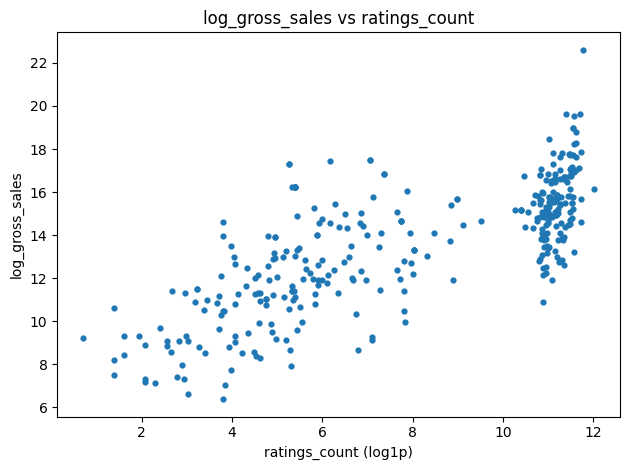

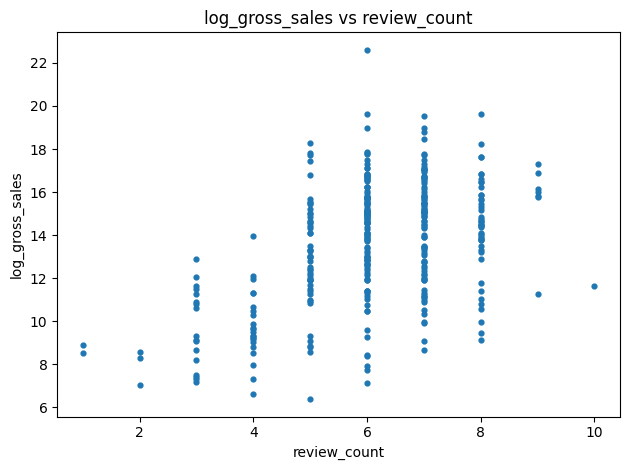

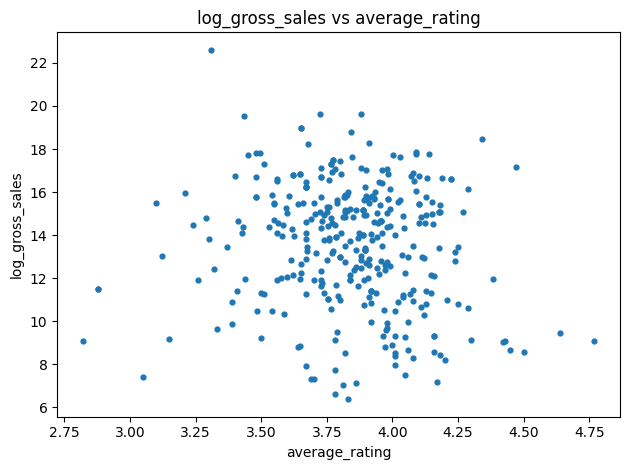

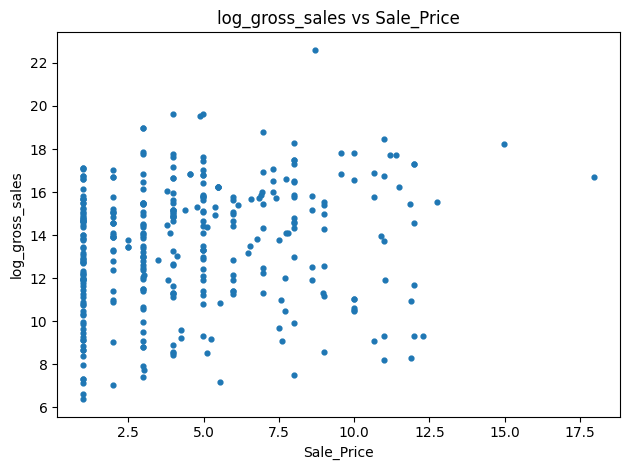

'eda_outputs\\sc_loggross_saleprice.png'

In [12]:
def scatter_plot(x, y, xlabel, ylabel, title, fname, logx=False):
    xx = x.copy()
    if logx:
        xx = np.log1p(xx)
        xlabel = xlabel + " (log1p)"
    plt.figure()
    plt.scatter(xx, y, s=12)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    path = os.path.join(OUT_DIR, fname)
    plt.savefig(path, dpi=170)
    plt.show()
    plt.close()
    return path

scatter_plot(book["ratings_count"], book["log_gross_sales"],
             "ratings_count", "log_gross_sales",
             "log_gross_sales vs ratings_count", "sc_loggross_ratingscount.png", logx=True)

scatter_plot(book["review_count"], book["log_gross_sales"],
             "review_count", "log_gross_sales",
             "log_gross_sales vs review_count", "sc_loggross_reviewcount.png", logx=False)

scatter_plot(book["average_rating"], book["log_gross_sales"],
             "average_rating", "log_gross_sales",
             "log_gross_sales vs average_rating", "sc_loggross_avg_rating.png", logx=False)

scatter_plot(book["Sale_Price"], book["log_gross_sales"],
             "Sale_Price", "log_gross_sales",
             "log_gross_sales vs Sale_Price", "sc_loggross_saleprice.png", logx=False)


# 9) Simple Text EDA on description


,word,count
0,one,248
1,life,221
2,new,170
3,will,166
4,all,162
5,world,152
6,love,141
7,story,135
8,can,135
9,novel,121


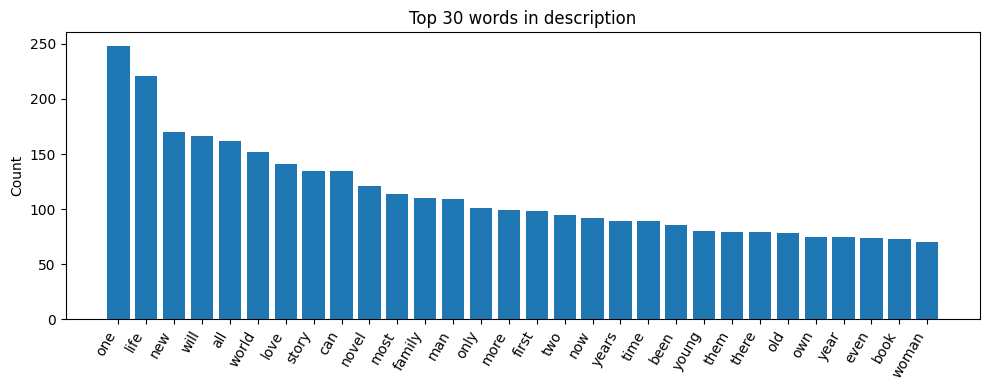

{'books_with_>1_publication_year': '176 / 344',
 'max_nunique_publication_year_per_book': 4,
 'reviews_with_rating_0': '58 (2.76%)',
 'rows_with_non_integer_ratings_count': '1856 (88.38%)',
 'description_missing': 42}

In [13]:
def tokenize(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    tokens = [t for t in text.split() if len(t) >= 3]
    return tokens

desc_tokens = []
for t in book["description"].fillna(""):
    desc_tokens.extend(tokenize(t))

stop = set("""
the and for you with that this from are was were have has had not but they she him her his their
into out over under about after before when where what who why how your our its
""".split())

desc_tokens = [t for t in desc_tokens if t not in stop]
top_words = Counter(desc_tokens).most_common(30)
top_words_df = pd.DataFrame(top_words, columns=["word", "count"])
display(top_words_df)

plt.figure(figsize=(10, 4))
plt.bar(top_words_df["word"], top_words_df["count"])
plt.title("Top 30 words in description")
plt.xticks(rotation=60, ha="right")
plt.ylabel("Count")
plt.tight_layout()
topwords_path = os.path.join(OUT_DIR, "bar_top_words_description.png")
plt.savefig(topwords_path, dpi=170)
plt.show()
plt.close()

# ---------
# 10) Data quality flags (important)
# ---------
pub_nunique = df.groupby(book_key)["publication_year"].nunique().sort_values(ascending=False)
inconsistent_books = int((pub_nunique > 1).sum())
max_editions = int(pub_nunique.max())

rating_zero = int((df["rating"] == 0).sum())
rating_zero_pct = round(rating_zero / len(df) * 100, 2)

ratings_count_nonint = int((df["ratings_count"] % 1 != 0).sum())
ratings_count_nonint_pct = round(ratings_count_nonint / len(df) * 100, 2)

flags = {
    "books_with_>1_publication_year": f"{inconsistent_books} / {pub_nunique.shape[0]}",
    "max_nunique_publication_year_per_book": max_editions,
    "reviews_with_rating_0": f"{rating_zero} ({rating_zero_pct}%)",
    "rows_with_non_integer_ratings_count": f"{ratings_count_nonint} ({ratings_count_nonint_pct}%)",
    "description_missing": int(df["description"].isna().sum()) if "description" in df.columns else None
}
flags